# PCA-report (round 2 - 19 September)

**4 PCAs:** <br> 

* PCA 1 (17Sep) : 14 elements, standardized and inverse normalized - *ok*
    * Cal, Dol, ORP, PH, Fe, Mn, Mg, S, Ca, Cd, Zr
    * See: http://nbviewer.ipython.org/urls/bitbucket.org/KerBrau/pcarticle/raw/master/Untitled.ipynb
* PCA 2 (19Sep): 13 elements, no normalization
    * Excluded Mg - *ok*
    * Replot without normalisation - *ok*
    * Plot unoxidized clay samples with a different symbol - *ok*
* PCA 3: 13 elements, remove unoxidised clay samples
* PCA 4: Merge mottled and unmottled clay samples
    * Plot difference between B and C horizon 
    * PCA 3A incl. oxidized samples 
        * Plot unoxidized clay samples with a different symbol
    * PCA 3B excl. oxidized samples

** Qs:**
* **Use standardized or invnorm data?**
    * **Impact of bimodal distributions?**
    
**Also:** <br>

* Linear PCA equations for Stew
* Line plots for all
* Chi test for each

**Data:** <br>

The BE dataset merges C-horizon data (unoxidized clay) for BE-SWNE and BE-SENW. It has 60 variables (elements), and 73 rows (sampling stations). We extract a subset of data limited to the elements to be considered in the PCA.

* Aim at having at least 5 time less variables than samples (=approx 14)
* Remove all elements with high correlation values (>90%)
* Select elements for which variability can be explained, ie. which are representative of reactions likely occuring at the ring edge

**Reactions & proxies: **

$CaCO_3+HCO_3^{-}=2CO_3^{2-}+Ca^{2+}+H^{+}$

In [40]:
%reload_ext rpy2.ipython

In [41]:
%%R
library(data.table)
d=data.frame(fread("BE_data_for_PCA.csv"))
print (dim (d))
names(d)

[1] 73 60
 [1] "V1"       "Dist"     "Line"     "Location" "Cal"      "Dol"     
 [7] "CalDol"   "ORP3"     "pH1"      "Al_ES"    "Fe_ES"    "Mg_ES"   
[13] "Mn_ES"    "Na_ES"    "P_ES"     "S_ES"     "K_ES"     "Ti_ES"   
[19] "V_ES"     "Ag_MS"    "Ba_MS"    "Be_MS"    "Ca_ES"    "Cd_MS"   
[25] "Ce_MS"    "Co_MS"    "Cr_MS"    "Cs_MS"    "Cu_MS"    "Dy_MS"   
[31] "Er_MS"    "Eu_MS"    "Ga_MS"    "Gd_MS"    "Hf_MS"    "Ho_MS"   
[37] "La_MS"    "Li_MS"    "Lu_MS"    "Mo_MS"    "Nb_MS"    "Nd_MS"   
[43] "Pb_MS"    "Pr_MS"    "Rb_MS"    "Sb_MS"    "Sm_MS"    "Sn_MS"   
[49] "Tb_MS"    "Th_MS"    "Tl_MS"    "Tm_MS"    "U._MS"    "W._MS"   
[55] "Y._MS"    "Yb_MS"    "Zn_MS"    "Zr_MS"    "LREE"     "HREE"    


In [42]:
%%R

#Subsetting by indexing
va=c("V1", "Dist", "Location", "Zr_MS", "Mn_ES", "Fe_ES", "pH1", "Ca_ES", "Cal", "Dol", "ORP3", "S_ES", "Cd_MS")
cnums=cbind(1:ncol(d), colnames(d))
subset=d[,as.numeric(cnums[cnums[,2] %in% va,1])]
print(length(va))
print (ncol(subset))
colnames(subset)

[1] 13
[1] 13
 [1] "V1"       "Dist"     "Location" "Cal"      "Dol"      "ORP3"    
 [7] "pH1"      "Fe_ES"    "Mn_ES"    "S_ES"     "Ca_ES"    "Cd_MS"   
[13] "Zr_MS"   


# PCA 2 (19Sep): 13 elements, no normalization

## Correlation plot
Black boxes represent element clusters.
* Cluster calculated using kmeans (?)
* **Why is ORP in the same cluster with Cd, Zr, Mn, Fe, despite low correlation?**

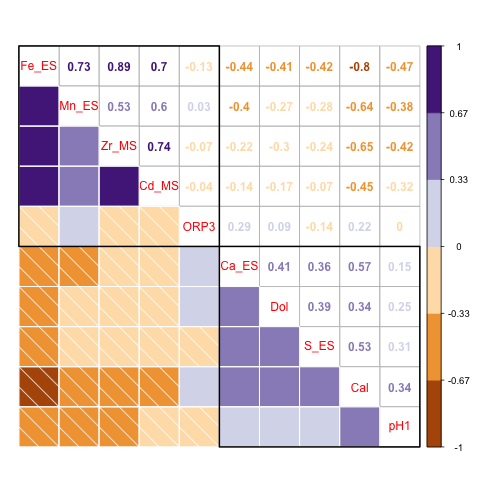

In [43]:
%%R
library("corrplot")
library("RColorBrewer")
#cor((subset[,4:13]))
corrplot.mixed(cor(subset[,4:13]), lower="shade", upper="number",order="AOE", col=brewer.pal(n=6, name="PuOr"))
corrRect.hclust(corr=cor(subset[,4:13]), k=2)

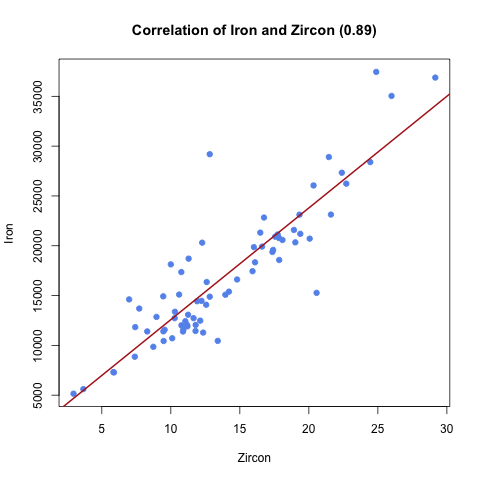

In [44]:
%%R
plot(x=subset$Zr_MS,y=subset$Fe_ES, pch=19, col="cornflowerblue",main="Correlation of Iron and Zircon (0.89)",xlab="Zircon",ylab="Iron")
abline(lm(subset$Fe_ES~subset$Zr_MS),lwd=2,col="firebrick")

# Standardizing (this time without normalizing)

In [46]:
%%R
# definir fonction standardisation et normalisation
stdnorm=function(x) {return((x-mean(x))/sd(x))}
## invnorm=function(x) {return(qnorm((rank(x, ties.method="random")-3/8)/(length(x)-0.75+1)))}

# normaliser les colonnes voulues de subset
## allnorm=data.frame(apply(as.matrix(subset[,4:13]), 2, invnorm))
## ncol(allnorm)

allnorm=data.frame(apply(as.matrix(subset[,4:13]), 2, stdnorm))
print (ncol(allnorm))
head (allnorm)

[1] 10
          Cal        Dol        ORP3         pH1      Fe_ES      Mn_ES
1  0.99601626 -3.2219968  0.47301460  1.23700034 -1.1914100 -0.9858038
2  0.89013868  0.7341925 -1.12402966  0.98654364 -0.8130269 -0.5492041
3 -0.07352678 -0.3275100  0.51676924 -1.13095392  0.4269280  0.3340321
4  0.88475507  0.2302940  0.04640689 -0.37958382 -0.7913632 -0.5742960
5 -1.70117030 -1.2181213  0.62615583  0.05302321  2.9104971  2.1908355
6  1.30108726  1.3318396  1.05276354  0.30347991 -1.0456191 -0.8954728
        S_ES      Ca_ES      Cd_MS      Zr_MS
1 -0.5358403  0.4572834 -0.5229658 -1.2097421
2  0.5740181  0.4552630 -0.1694797 -0.3969719
3 -0.4125227  0.4541266  0.5374926  0.4933809
4  0.2928539  0.4560206 -0.1694797 -0.5595260
5 -1.3152075 -2.1427669  1.5979511  2.8116231
6  0.8157205  0.4512223  0.1840065 -0.9622167


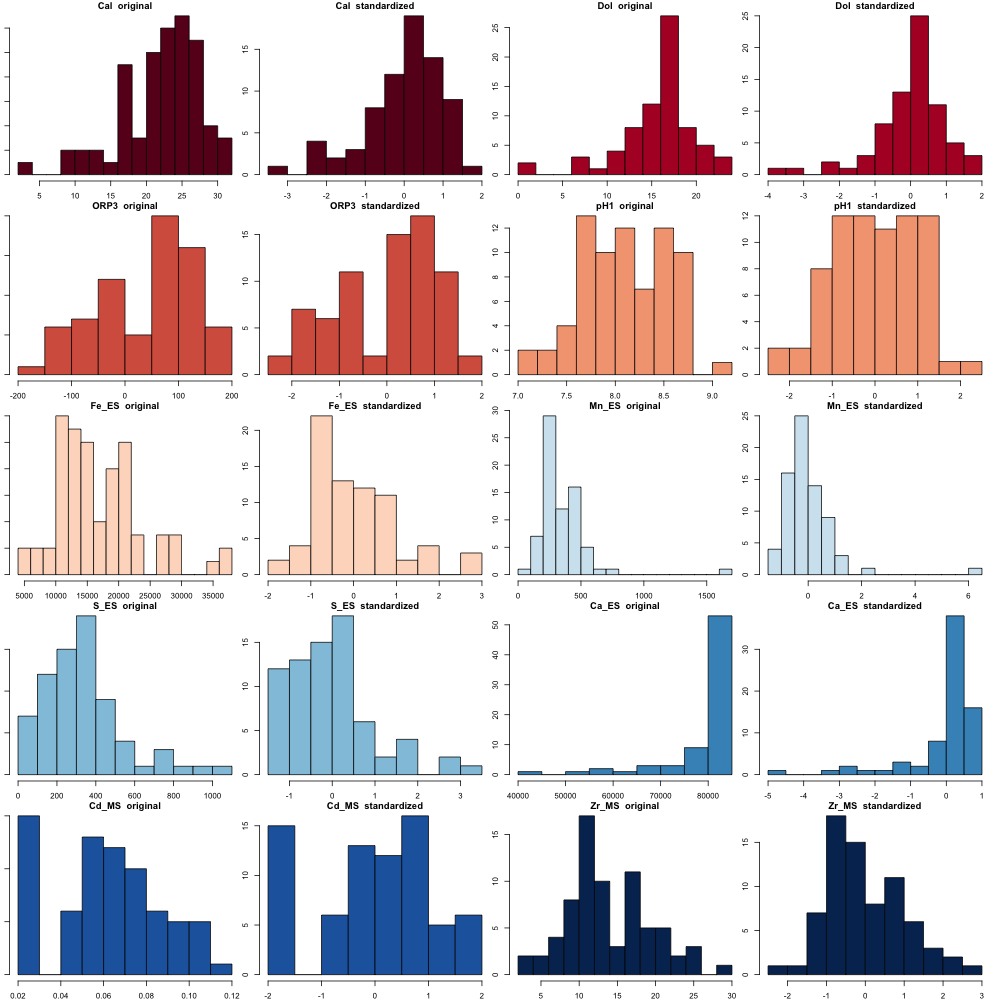

In [186]:
%%R -w 1000 -h 1000

#place side by side
par(mfrow=c(5,4),mar=c(2,1,1,1))

#alternative: color=c("yellow","blue","orange","red","green","pink","purple","salmon","beige","turquoise")
color=brewer.pal(n=10, name="RdBu")
for (n in 1:10)
    
{
hist(subset[,n+3],breaks=12,main=paste(colnames(subset)[n+3]," original"),col=color[n])
hist(allnorm[,n],breaks=12,main=paste(colnames(subset)[n+3]," standardized"),col=color[n])
}



## PCA 

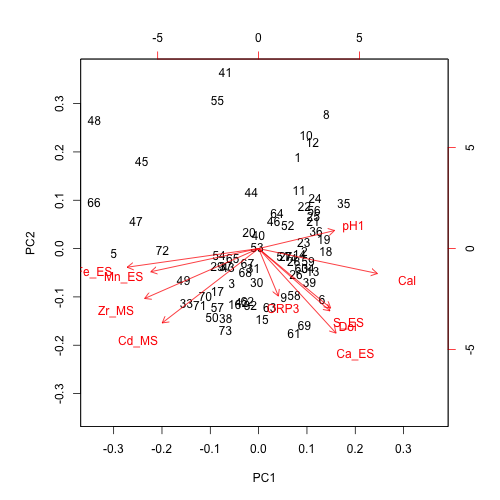

In [48]:
%%R -h 500 -w 500
pca=prcomp(allnorm)

#Biplot
biplot(pca,pch=19)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.1466 1.1834 1.0904 0.87410 0.81657 0.74803 0.58210
Proportion of Variance 0.4608 0.1400 0.1189 0.07641 0.06668 0.05596 0.03388
Cumulative Proportion  0.4608 0.6008 0.7197 0.79615 0.86282 0.91878 0.95266
                           PC8     PC9    PC10
Standard deviation     0.52908 0.38699 0.20899
Proportion of Variance 0.02799 0.01498 0.00437
Cumulative Proportion  0.98066 0.99563 1.00000


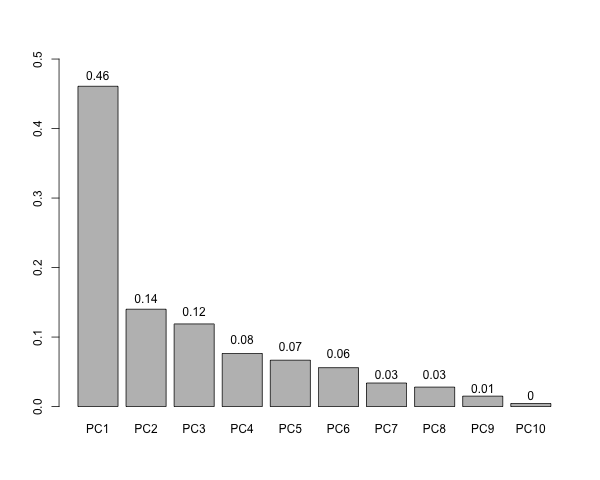

In [64]:
%%R -w 600
#display values
print (summary (pca))
#barplot with labels
bp = barplot(summary(pca)$importance[2,],ylim=c(0,0.5))
vals = round(summary(pca)$importance[2,],2)
text (bp,vals, labels = vals, pos = 3)

In [76]:
%%R
print (pca)

Standard deviations:
 [1] 2.1466408 1.1833684 1.0904040 0.8741001 0.8165694 0.7480323 0.5820996
 [8] 0.5290779 0.3869905 0.2089920

Rotation:
              PC1        PC2         PC3         PC4         PC5         PC6
Cal    0.40099341 -0.1526541  0.06777657 -0.22491490  0.25817455 -0.21344112
Dol    0.24076597 -0.3813914 -0.15014093  0.33077146 -0.77428315  0.08533013
ORP3   0.06662658 -0.2907958  0.76518140  0.32305610  0.16092939 -0.19611745
pH1    0.25626504  0.1104590 -0.23732397  0.75668609  0.41817464  0.30655809
Fe_ES -0.44394120 -0.1141387 -0.05706628  0.04356545  0.03473557  0.13427482
Mn_ES -0.36431669 -0.1418036  0.03021311  0.28990191 -0.08328045 -0.53598411
S_ES   0.24318179 -0.3641864 -0.51553330 -0.07303937  0.23114898 -0.45473611
Ca_ES  0.26135610 -0.5178085  0.16834987 -0.25276522  0.07344733  0.41394507
Cd_MS -0.32535603 -0.4551683 -0.15660740  0.06261142  0.21030126 -0.01699771
Zr_MS -0.38472559 -0.3056183 -0.09070423 -0.06307288  0.14788522  0.36192357
           

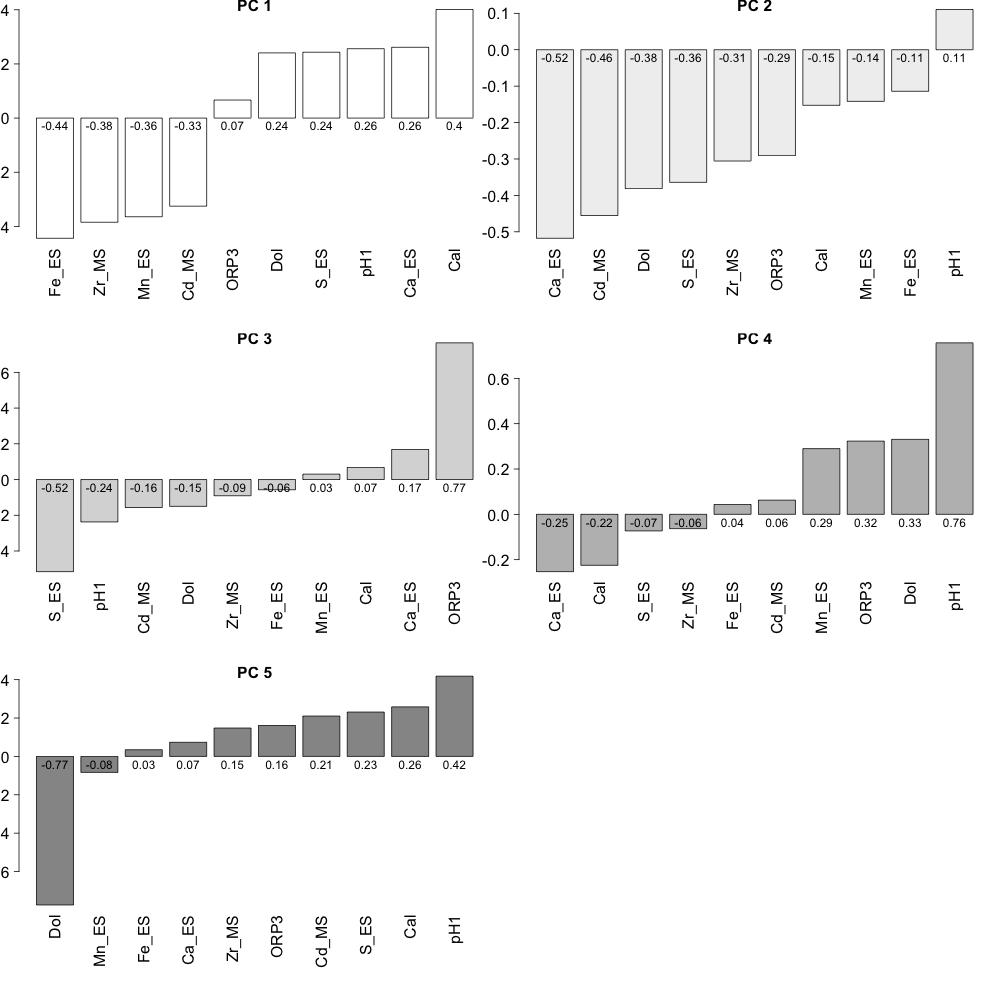

In [102]:
%%R -w 1000 -h 1000

#place side by side
par(mfrow=c(3,2),mar=c(10,2,1,1))

color=brewer.pal(n=8, name="Greys")
for (n in 1:5)
{    
#composantes de PC1(changer index pour PCN)
bp=barplot(sort(pca$rotation[,n]),main=paste("PC",n),col=color[n],cex.main=2,cex.axis=2,cex=2,las=2)
#add labels
vals=round(sort(pca$rotation[,n]),2)
text(bp,0,vals,labels=vals,pos=1,cex=1.5)
}

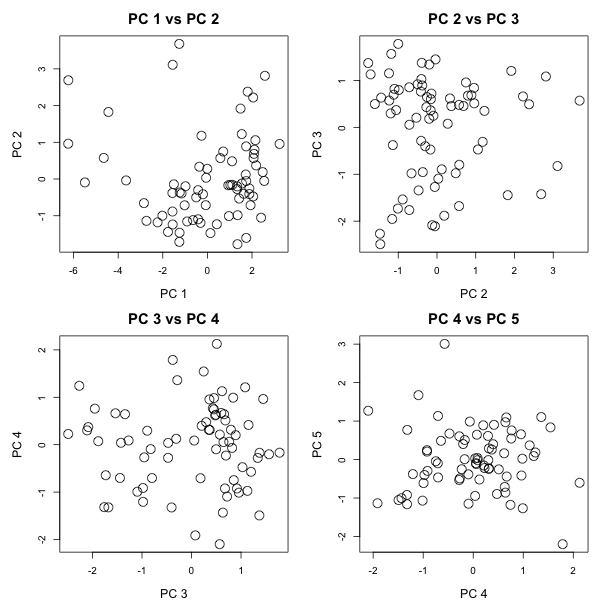

In [151]:
%%R -w 600 -h 600

# Place side by side
par(mfrow=c(2,2),mar=c(4,5,3,1))

# Plot PCs wrt each other 
for (n in 1:4)
{    
plot(pca$x[,n], pca$x[,n+1],main=paste("PC",n,"vs PC",n+1),xlab=paste("PC",n), ylab=paste("PC",n+1),cex.lab=1.25,cex.main=1.5,cex.axis=1,cex=2)
}

## Subsetting unoxidized C-horizon samples

The C-horizon dataset consists of oxidized and unoxidized samples, as outlined in figure 8 of the paper. Unoxidized samples will be labelled differently. Information drawn from column V and W of sheet "00-B (&meta)" in excel "BE-99-00_plots" in "1_data-THESIS_EDITED". <br>

14 out of 38 samples along the SE-NW line are unoxidized:
    * BE-59, -400m
    * BE-70 to BE-80, -205 to -50m
    * BE-54, 175m
    * BE-53, 200m

In [231]:
%%R

#Subset with subset function
unox=subset(subset,V1=="BE-59"|V1=="BE-70"|V1=="BE-71"|V1=="BE=72"|V1=="BE-73"|V1=="BE-74"|V1=="BE-75"|V1=="BE-76"|V1=="BE-77"|V1=="BE-78"|V1=="BE-79"|V1=="BE-80"|V1=="BE-54"|V1=="BE-53")
print(unox)

      V1 Dist Location   Cal   Dol ORP3  pH1 Fe_ES Mn_ES S_ES Ca_ES Cd_MS Zr_MS
2  BE-59 -400      OUT 27.02 18.69  -59 8.54 11444   241  456 82568  0.06 11.79
9  BE-70 -205 NEAREDGE 25.15 16.38  -42 8.12 14433   273  731 82502  0.09 11.91
10 BE-71 -200     EDGE 21.24 16.72   69 8.35  7317   110  228 67220  0.02  5.84
12 BE-73 -190     EDGE 23.20 17.84   49 8.45  7281   116  108 71857  0.02  5.88
13 BE-74 -185 NEAREDGE 28.42 17.15   29 8.74 11388   241  709 78371  0.07 10.88
14 BE-75 -180       IN 24.61 18.07  -59 8.61 14467   306  738 78577  0.05 12.22
15 BE-76 -175       IN 21.59 21.06  -28 8.73 19377   369  674 78433  0.10 17.36
16 BE-77 -170       IN 19.28 17.12  -42 8.53 20342   418  557 78394  0.11 19.02
17 BE-78 -150       IN 16.27 13.07  -15 8.45 20910   473  529 78268  0.12 17.56
18 BE-79 -100       IN 25.53 19.60  -32 8.58 12428   257  902 78538  0.02 11.05
19 BE-80  -50       IN 27.31 16.45  -25 8.60 12047   273  885 78436  0.02 11.18
23 BE-54  175       IN 26.69 16.14  -24 

## PC Score transects

PC score transects differ primarily for PC3-5. <br>

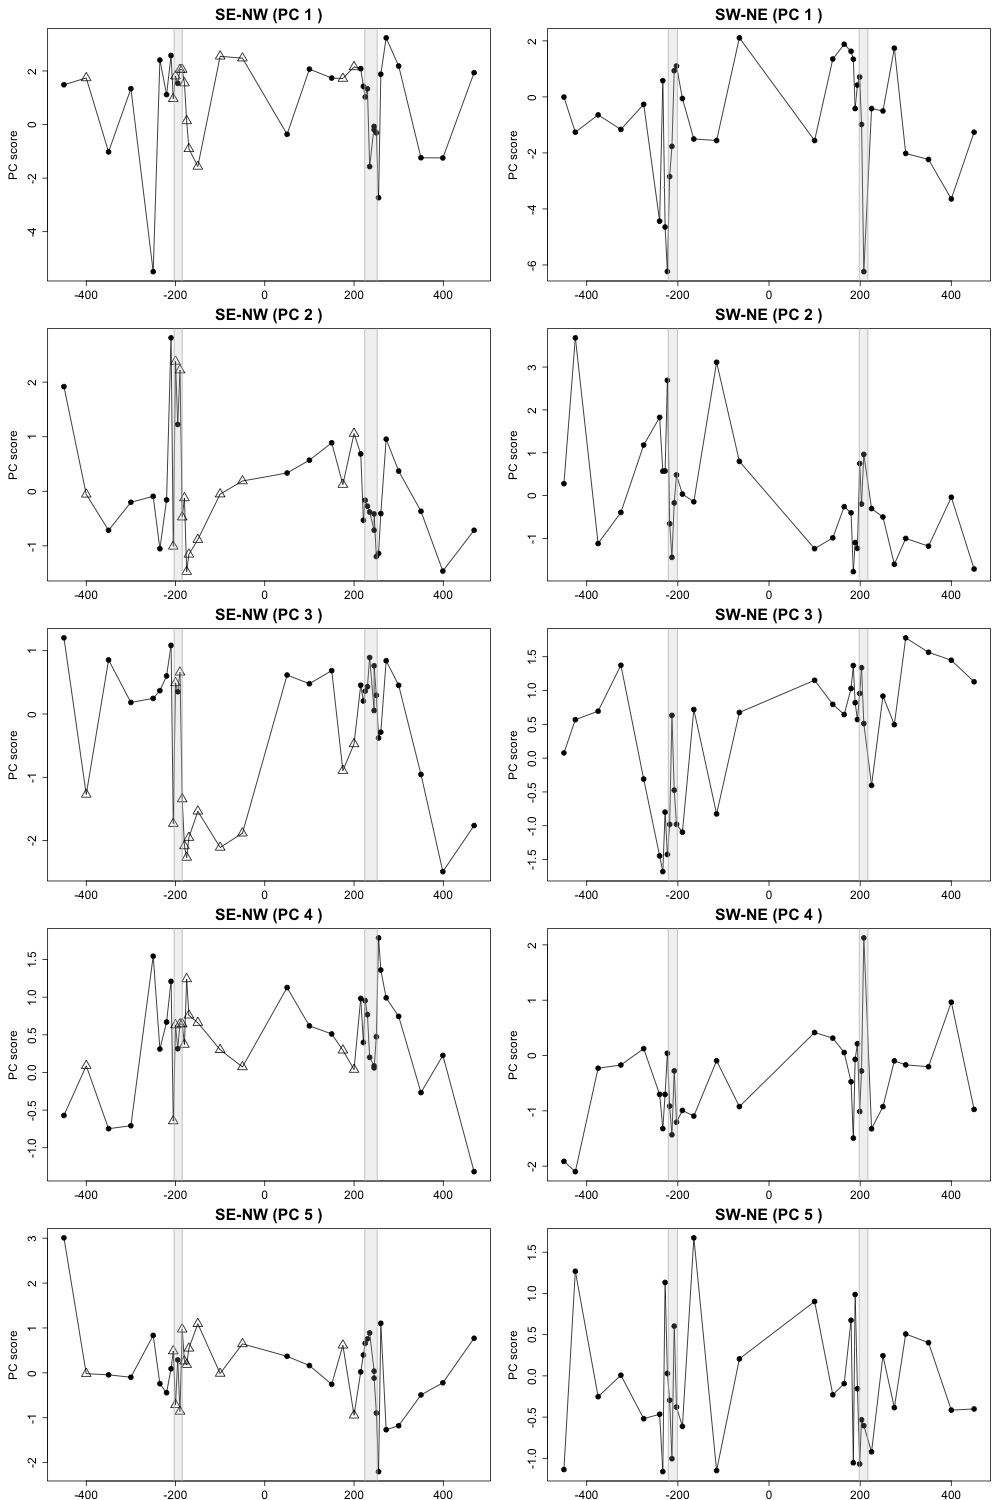

In [257]:
%%R -w 1000 -h 1500

#export
##pdf("BE_ScoreTrans_13elmt_Std.pdf", width=15, height=20)

### FUNCTION FOR TRANSPARENT COLORS
makeTransparent = function(coul, alpha=0.2) {
  alpha = floor(255*alpha)  
  col = col2rgb(coul, alpha=FALSE)
    return(rgb(red=col[1], green=col[2], blue=col[3], alpha=alpha, maxColorValue=255))
    }

#Plot PCs over distance
par(mfrow=c(5,2), mar=c(2,5,3,1))
for (pcindex in 1:5){
    
first=pca$x[d$Line=="SE-NW",]
second=pca$x[d$Line=="SW-NE",]

a=cbind(subset$Dist[d$Line=="SE-NW"], first[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], pch=ifelse(subset$V1 %in% unox$V1,24,20),ylab=paste("PC score"),xlab="",cex=2,cex.axis=1.5,cex.lab=1.5)

#Alternative method
## Lines () or plot (type="l")
## Points (first subset, pch=24)
## Points(second subset,pch=6)
    
senw_xleft=c(-203,224)
senw_xright=c(-185,252)
lines(a[order(a[,1]),1], a[order(a[,1]),2])
rect(senw_xleft, -6, senw_xright, 6, border="grey", col=makeTransparent("grey"))
title(paste("SE-NW (PC",pcindex,")"), cex.main=2)
    
a=cbind(subset$Dist[d$Line=="SW-NE"], second[,pcindex])
plot(a[order(a[,1]),1], a[order(a[,1]),2], type="l", ylab=paste("PC score"),xlab="",cex.axis=1.5,cex.lab=1.5)

swne_xleft=c(-221, 198)
swne_xright=c(-201, 217)
points(a[order(a[,1]),1], a[order(a[,1]),2], pch=20,cex=2)
rect(swne_xleft, -7, swne_xright, 7, border="grey", col=makeTransparent("grey"))
title(paste("SW-NE (PC",pcindex,")"),cex.main=2)
}

#dev.off()